<a href="https://colab.research.google.com/github/RoshanKumar854/ML-Projects/blob/main/Coursera_2_week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import tensorflow as tf


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [70]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('data.csv')
dataset = df.values

In [71]:
X_train, X_test, y_train, y_test = train_test_split(dataset[:, :6], dataset[:, 6:], test_size=0.2)

In [72]:
temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = y_train[:, 0], y_train[:, 1]
inflam_test, nephr_test = y_test[:, 0], y_test[:, 1]

In [73]:
from tensorflow.keras import Input, layers

shape_input =(1, )
temperature = Input(shape=shape_input, name='temp')
nausea_occurence = Input(shape=shape_input, name='nocc')
lumbar_pain = Input(shape=shape_input, name='lumbp')
urine_pushing = Input(shape=shape_input, name='up')
micturition_pains = Input(shape=shape_input, name='mict')
bis = Input(shape=shape_input, name='bis')

In [74]:
list_inputs = [temperature, nausea_occurence, lumbar_pain, urine_pushing,
               micturition_pains, bis]

In [85]:
X = layers.concatenate(list_inputs)

In [76]:
inflammation_pred = layers.Dense(1, activation='sigmoid', name='inflam')(X)
nephritis_pred = layers.Dense(1, activation='sigmoid', name='nephe')(X)

In [77]:
list_outputs = [inflammation_pred, nephritis_pred]

In [78]:
model = tf.keras.Model(inputs=list_inputs, outputs=list_outputs)

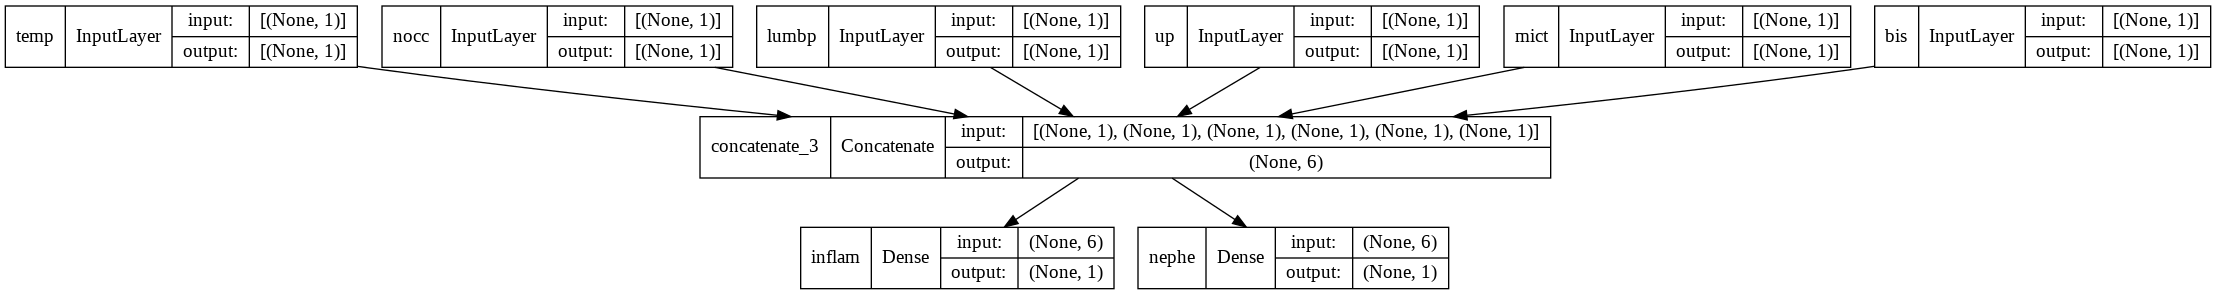

In [79]:
tf.keras.utils.plot_model(model, 'multi_input_output_model.png', show_shapes=True)

In [80]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3),
              loss=['binary_crossentropy', 'binary_crossentropy'],
              metrics=['acc','mse'],
              loss_weights=[1., 0.2])

In [87]:
input_train = [temp_train, nocc_train, lumbp_train, mict_train, bis_train]
outputs_train = [inflam_train, nephr_train]

from keras import backend as K
input_train = K.cast_to_floatx(input_train)
outputs_train = K.cast_to_floatx(outputs_train)

ValueError: ignored

In [86]:
history = model.fit(input_train, outputs_train,
                    epochs=100,
                    batch_size=128,
                    verbose=True)


ValueError: ignored